<a href="https://colab.research.google.com/github/paulkun/TinyML/blob/main/ex_Numpi_random_generating_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<출처>
https://rfriend.tistory.com/284

https://m.blog.naver.com/stop2y/221527152851

[Python NumPy] 무작위 표본 추출, 난수 만들기 (random sampling, random number generation)

이번 포스팅에서는 시간과 비용 문제로 전수 조사를 못하므로 표본 조사를 해야 할 때, 기계학습 할 때 데이터셋을 훈련용/검증용/테스트용으로 샘플링 할 때, 또는 다양한 확률 분포로 부터 데이터를 무작위로 생성해서 시뮬레이션(simulation) 할 때 사용할 수 있는 무작위 난수 만들기(generating random numbers, random sampling)에 대해서 알아보겠습니다.

 Python NumPy는 매우 빠르고(! 아주 빠름!!) 효율적으로 무작위 샘플을 만들 수 있는 numpy.random 모듈을 제공합니다. 


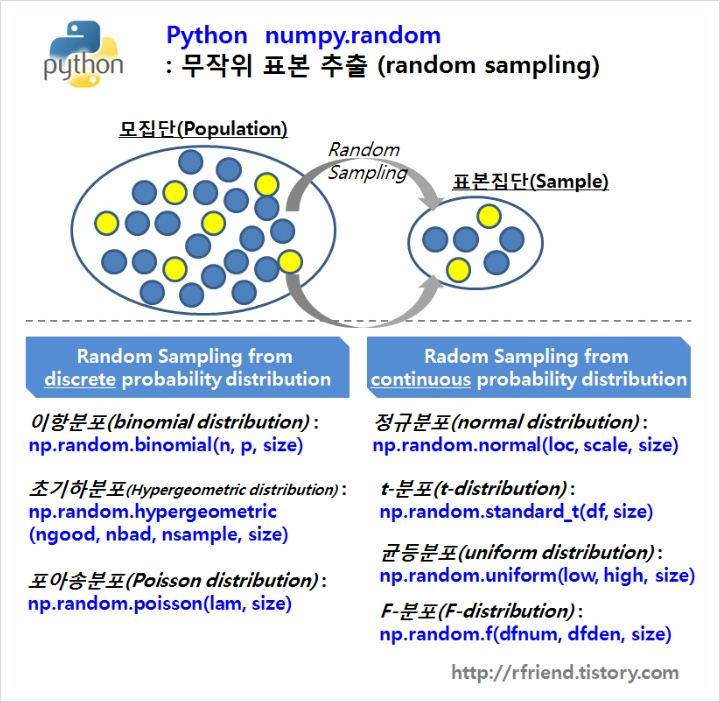

In [ ]:
import numpy as np

#정류분포(normal)난수 5개 생성
normalOne = np.random.normal(size=5)
print( "normalOne=", normalOne) 

# 매 실행 할 때마다 생성되는 난수가 달라 진다.
normalTwo = np.random.normal(size=5)
print( "normalTwo=", normalTwo)

NumPy 를 불러오고, 정규분포(np.random.normal)로 부터 개수가 5개(size=5)인 무작위 샘플을 만들어보겠습니다. 무작위 샘플 추출을 할 때마다 값이 달라짐을 알 수 있습니다.

In [ ]:
import numpy as np

print( np.random.normal(size=5) )
print( np.random.normal(size=5) )# array with different random numbers

#seed와 size 모수 설정
먼저, seed와 size 모수 설정하는 것부터 소개합니다.

## seed : 난수 생성 초기값 부여
난수 생성 할 때 마다 값이 달라지는 것이 아니라, 누가, 언제 하든지 간에 똑같은 난수 생성을 원한다면 (즉, 재현가능성, reproducibility) seed 번호를 지정해주면 됩니다.

In [ ]:
# seed : setting the seed number for random number generation for reproducibility
#see값을 부여하여 정규분포 난수 생성
np.random.seed(seed=100)
print( np.random.normal(size=5) )

#위의 seed값과 동일한 값을 적용하여 난수 생성
# exactly the same with the above random numbers
np.random.seed(seed=100)
print( np.random.normal(size=5) ) # 위의 결과랑 똑같음

##size : 샘플 생성(추출) 개수 및 array shape 설정
다차원의 array 형태로 무작위 샘플을 생성할 수 있다는 것도 NumPy random 모듈의 장점입니다.

In [ ]:
 # size : int or tuple of ints for setting the shape of nandom number array

a = np.random.normal(size=2)
print("a=\r\n",a)
print("\r\n")

b = np.random.normal(size=(2, 3))
print("b=\r\n",b)
print("\r\n")


c = np.random.normal(size=(2, 3, 4))
print("c=\r\n",c)


# 다양한 확률 분포로부터 난수 생성
다양한 확률 분포로부터 난수를 생성해보겠습니다.  먼저, 정수를 뽑는 이산형 확률 분포(discrete probability distribution)인 (1-1) 이항분포, (1-2) 초기하분포, (1-3) 포아송분포로 부터 무작위 추출하는 방법을 알아보겠습니다.

 각 확률분포에 대한 설명까지 곁들이면 포스팅이 너무 길어지므로 참고할 수 있는 포스팅 링크를 걸어놓는 것으로 갈음합니다.

- 이항분포 (Binomial Distribution) :  http://rfriend.tistory.com/99
- 초기하분포 (Hypergeometric distribution) :  http://rfriend.tistory.com/100
- 포아송 분포 (Poisson Distribution) :  http://rfriend.tistory.com/101


##(1-1) 이항분포로 부터 무작위 표본 추출 
(Random sampling from Binomial Distribution) : np.random.binomial(n, p, size)

앞(head) 또는 뒤(tail) (n=1) 가 나올 확률이 각 50%(p=0.5)인 동전 던지기를 20번(size=20) 해보았습니다. 

In [ ]:
 # (1) 이산형 확률 분포 (Discrete Probability Distribution)
# (1-1) 이항분포 (Binomial Distribution) : np.random.binomial(n, p, size)
#       : 복원 추출 (sampling with replacement)
#       : n an integer >= 0 and p is in the interval [0,1]

# n=0~1정수형, p=0.5(=50%), size=출력수
a = np.random.binomial(n=1, p=0.5, size=20)
print("a=\r\n",a)
print("\r\n")

# 0~1정수형 50% 확률로 100번 던졌을 때 ==1과 같은 수가 나온 수의 합을 /100 한다.
SUM = sum(np.random.binomial(n=1, p=0.5, size=100) == 1)/100
print("SUM=",SUM)

## (1-2) 초기하분포에서 무작위 표보 추출 
(Random sampling from Hypergeometric distribution) : np.random.hypergeometric(ngood, nbad, nsample, size)

  샘플을 무작위로 비복원 추출하고자 할 때 사용된다. 인자 값에서 nsample은 sample의 인덱스 (원래 값)이며, 이를 구하기 위한 확률을 지정한다.
  ngood을 높일 수록 nsample의 인덱스에 가까워지며, nbad를 높일 수록 nsample의 인덱스와 멀어진다.
  예를들어서 nsample을 2로 할 시 0,1,2라는 숫자 인덱스가 표현될 수 있는데 ngood 100 : nbad 0을 하게 될 시 나오는 값들은 모두 2이며 반대로 ngood 0 : nbad 100으로 할 시 모두 0으로 수렴한다. 즉, 이둘을 잘 조합해서 적당한 배열로 나타낼 수 있다.

good 이 5개, bad 가 20개인 모집단에서 5개의 샘플을 무작위로 비복원추출(random sampling without replacement) 하는 것을 100번 시뮬레이션 한 후에, 도수분포표를 구해서, 막대그래프로 나타내보겠습니다.

In [ ]:
# (1-2) 초기하분포 (Hypergeometric distribution)
#       : 비복원 추출(sampling without replacement)
#       : np.random.hypergeometric(ngood, nbad, nsample, size=None)

np.random.seed(seed=100)
rand_hyp = np.random.hypergeometric(ngood=5, nbad=20, nsample=5, size=100)
print(rand_hyp)
print("\r\n")

# result table of 100 simulation
# unique함수:고유값을 정렬반환, return_counts=True:고유값의 개수 배열 반환(겹치는 수량 반환)
unique, counts = np.unique(rand_hyp, return_counts=True)
aa = np.asarray((unique, counts))
print("aa=\r\n",aa)
print("rand_hyp배열이 0은 27개, 1은 53개, 2는16개, 3은 4개 생성되었다.\r\n")

#전치행렬 처리
bb=np.asarray((unique, counts)).T
print("aa.T=\r\n",bb)

# bar plot
import matplotlib.pyplot as plt
plt.bar(unique, counts, width=0.5, color="blue", align='center')

##(1-3) 포아송분포로 부터 무작위 표본 추출 : 
   np.random.poisson(lam, size) (random sampling from Poisson distribution)
일정한 단위 시간, 혹은 공간에서 무작위로 발생하는 사건의 평균 회수인 λ(lambda)가 20인 포아송 분포로 부터 100개의 난수를 만들어보겠습니다. 그 후에 도수를 계산하고, 막대그래프로 분포를 그려보겠습니다.

In [ ]:
# (1-3) 포아송 분포 (Poisson Distribution)
# np.random.poisson(lam=1.0, size=None)
# Poisson distribution is the limit of the binomial distribution for large N

#포아송분포 난수 생성
np.random.seed(seed=100)
rand_pois = np.random.poisson(lam=20, size=100)
print(rand_pois)
print("\r\n")

#생성 난수와 난수발생수량 행렬로 전치
unique, counts = np.unique(rand_pois, return_counts=True)
rand_pois_T = np.asarray((unique, counts)).T
print(rand_pois_T)
print("\r\n")

#그래프 출력
plt.bar(unique, counts, width=0.5, color="red", align='center')